PROBLEM STATEMENT: As more online users move from desktop to mobile, it's become increasely important that 
established internet giants like Google and Facebook, who have built their enterprises on online ad revenue learn to
make mobile ad revenue just as profitable as traditional desktop. Online ad revenue is a function of cost per a click (CPC)and click through rate (CTR). Cost per a click is the amount of money an advertiser is willing to pay per a user click. Click through rate is a user's propensity to click on an ad. This project tries to answer the question of what drives mobile CTR, a binary event. Based on various environmental factors (site, app, device type), will the ad be clicked or not?

A formula to better understand the relationship between CTR and CPC: 

                            CPM = 1000 × CTR × CPC 

CPM stands for cost per 1000 impressions. CPM is the core metric used to allow both sell and buy-side players to look at costs(advertisers)/earnings(publishers) across campaigns paid on a per click basis or a per impression basis. Adveristers can choose to pay on a cost per a click (CPC) or a cost per a 1000 impressions (CPM). Traditionally advertisers trying to promote brand awareness will pay on a CPM basis and advertisers looking for a user to take an action (purchase, sign-up, etc.) will pay on a CPC basis. 
 
 
HYPOTHESIS: I would expect the position of the ad will be the greatest influencer of CTR. 

DOMAIN KNOWLEDGE: I previously worked in this space for 4 years and worked to optimize ad size, placement, and ad server settings to increase publishers' revenue. At the time I left the industry (2014) there was hightened concern on solving the mobile problem as advertisers were not willing to pay as much for mobile advertising (declining CPC) because of the platform's lower conversion rates. Since 2014, my understanding is CPCs have continued to fall but industry giants have continued to increase annual revenues because of their gains in CTR. This projects aims to answer the question of where the greatest gains can be found in mobile CTR. 

DATA SOURCE: This data set is taken from a Kaggle competition offered by Avazu data. There are more than 40 million rows and 24 different columns or variables available in the training data set. There is a also a test data set to test any predictive model. A few of the notable variables included are time of day the ad is clicked, device information, as well as if the ad was in an app or website environment. The dependent variable, if the user clicked the ad, is tracked in column "click." A click is denoted by a "1" and a non-click is denoted by a "0". 

GOAL: Determine the key variables that determine if a mobile ad will be clicked. I'd like to use this knowledge to speak intelligently from quantitative data on what drives mobile ad CTR. Although I'm not currently working in this space, I am entertaining the possiblity of returning to the industry.

PROJECT CONCERNS: From experience I know ad size is a huge indicator if an ad is clicked. I'm unclear if this data set provides that information or also importantly, what's the ad's format (video, text, etc)?

EXPLORATORY ANALYSIS & CLEANING THE DATA...


In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import feature_selection, linear_model, cross_validation

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('/Users/lsergio/DS-SF-34/final-project/datasets/train_1.gz', compression='gzip', header=0, sep=',', quotechar='"')



/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23


In [13]:
for column in df.columns:
    print column

id
click
hour
C1
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21


In [14]:
df.shape[0]

40428967

In [15]:
df.describe()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [16]:
df.isnull().sum().sum()

0

In [4]:
df.corr()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
click,1.000000,-0.007782,-0.036855,0.025890,-0.037830,-0.083408,-0.060169,-0.032521,0.130007,-0.055681,0.021634,-0.003978,-0.057506,-0.069953
hour,-0.007782,1.000000,-0.005553,0.026920,-0.005648,0.051195,0.195997,0.022496,0.003247,0.186367,0.012831,0.043241,0.025318,0.065933
C1,-0.036855,-0.005553,1.000000,0.288329,0.894596,0.195931,0.055226,0.120295,0.062921,0.063637,-0.041050,0.002725,-0.035056,0.035535
banner_pos,0.025890,0.026920,0.288329,1.000000,0.323183,-0.083752,-0.012926,0.060286,0.022941,-0.032304,0.094986,0.131640,0.055297,-0.097382
device_type,-0.037830,-0.005648,0.894596,0.323183,1.000000,0.209063,0.043937,0.178742,0.065195,0.049912,-0.045669,-0.001971,-0.048553,0.035808
device_conn_type,-0.083408,0.051195,0.195931,-0.083752,0.209063,1.000000,0.067199,0.069883,-0.015289,0.079511,-0.062000,-0.010088,0.089374,0.061946
C14,-0.060169,0.195997,0.055226,-0.012926,0.043937,0.067199,1.000000,0.002753,0.037306,0.976855,-0.231103,-0.133090,0.024246,0.409550
C15,-0.032521,0.022496,0.120295,0.060286,0.178742,0.069883,0.002753,1.000000,-0.073895,0.001456,0.012502,0.050268,0.008239,0.001780
C16,0.130007,0.003247,0.062921,0.022941,0.065195,-0.015289,0.037306,-0.073895,1.000000,0.047510,0.083749,-0.073857,-0.045241,-0.084774
C17,-0.055681,0.186367,0.063637,-0.032304,0.049912,0.079511,0.976855,0.001456,0.047510,1.000000,-0.246152,-0.128811,0.008760,0.422757


KEY TAKEAWAYS FROM CORR(): Of the variables that are defined, device connection type most affects a user's likelihood to click on an ad (-0.083408 correlation coefficient). Followed by device type and banner position. Of all the variables, C16 most impacts a user's likelihood to click with a .130007 correlation coefficient. 

In [21]:
df.dtypes

id                  object
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [9]:
df.C1.unique()

array([1005, 1002, 1010, 1001, 1007, 1008, 1012])

In [8]:
df.banner_pos.unique()

array([0, 1, 4, 5, 2, 7, 3])

In [10]:
df.site_id.unique()

array(['1fbe01fe', 'fe8cc448', 'd6137915', ..., 'aaca6ef0', 'efca7c44',
       '82b4318e'], dtype=object)

In [11]:
df.site_domain.unique()

array(['f3845767', '9166c161', 'bb1ef334', ..., 'e05edb43', 'd761e9fb',
       '6e5c932a'], dtype=object)

In [12]:
df.site_category.unique()

array(['28905ebd', '0569f928', 'f028772b', '50e219e0', '3e814130',
       '76b2941d', 'f66779e6', '335d28a8', '72722551', '75fa27f6',
       '110ab22d', 'c0dd3be3', 'bcf865d9', 'a818d37a', '42a36e14',
       'e787de0e', '5378d028', '9ccfa2ea', '70fb0e29', 'dedf689d',
       '8fd0aea4', '74073276', 'c706e647', '6432c423', 'a72a0145',
       'da34532e'], dtype=object)

In [13]:
df.app_id.unique()

array(['ecad2386', '98fed791', '66a5f0f3', ..., '85e54472', '03e09b02',
       'f6c2f1c3'], dtype=object)

In [14]:
df.app_domain.unique()

array(['7801e8d9', 'd9b5648e', '2347f47a', '45a51db4', '82e27996',
       '5c5a694b', '0654b444', 'aefc06bd', '33da2e74', 'ad63ec9b',
       '5b9c592b', 'ae637522', '885c7f3f', 'b9528b13', '813f3323',
       'c6824def', 'b5f3b24a', '5c620f04', '43cf4f06', 'f2f777fb',
       '18eb4e75', 'e787a6bc', '15ec7f39', 'db829551', 'f3ad7798',
       '6f7ca2ba', 'df32afa9', 'afdf1f54', '5ac0b939', 'b8d325c3',
       '3feeed1e', 'e5d5313f', '1ed56ded', '56eabb45', '713c0c91',
       '828da833', 'b2816726', '2b627705', '1ea19ec4', '88293ffa',
       'c41aa5ee', '2d332391', 'fc41b20c', '5b3f66ff', '9acfe436',
       '90706f5d', '27ee373d', 'b0920d40', '8bb7dba9', '51174fb1',
       '2022d54e', 'f5a7c834', 'ef1fc174', 'd6feb1a4', '8d87821d',
       '99b4c806', 'd9f4700d', '47464e95', '6a0a3a9d', '47db8711',
       '48aec236', '15c23f8e', 'b408d42a', '73fc6786', '0b7d3d7d',
       '86aa8fec', 'fd5f0ee2', 'a5f9dc5b', '64ae80a5', 'a271c340',
       '4fafd4c4', 'c91cbbb4', 'af237497', '0e8616ad', 'b6c7e8

In [15]:
df.app_category.unique()

array(['07d7df22', '0f2161f8', 'cef3e649', '8ded1f7a', 'f95efa07',
       '75d80bbe', '4ce2e9fc', 'd1327cf5', '09481d60', 'fc6fa53d',
       'dc97ec06', 'a3c42688', '0f9a328c', '879c24eb', 'a86a3e89',
       '7113d72a', 'a7fd01ec', '4681bb9d', '8df2e842', '2281a340',
       '18b1e0be', '0bfbc358', '79f0b860', '4b7ade46', '86c1a5a3',
       '2fc4f2aa', '5326cf99', 'ef03ae90', '71af18ce', '52de74cf',
       'bd41f328', 'f395a87f', 'cba0e20d', '6fea3693', 'bf8ac856',
       '0d82db25'], dtype=object)

In [18]:
df.device_id.unique()

array(['a99f214a', 'c357dbff', 'fb23c543', ..., '53cd6af3', 'd1dcc829',
       '2e7d4e84'], dtype=object)

In [19]:
df.device_ip.unique()

array(['ddd2926e', '96809ac8', 'b3cf8def', ..., 'd9e2a457', '7c9e21ff',
       'e1b5bcff'], dtype=object)

In [5]:
df.device_model.unique()

array(['44956a24', '711ee120', '8a4875bd', ..., '4c34fd04', '706098d6',
       '50d70abf'], dtype=object)

In [16]:
df.device_type.unique()

array([1, 0, 4, 5, 2])

In [17]:
df.device_conn_type.unique()

array([2, 0, 3, 5])

In [22]:
df.loc[40428960]

id                  9998613662398752368
click                                 0
hour                           14103023
C1                                 1005
banner_pos                            0
site_id                        85f751fd
site_domain                    c4e18dd6
site_category                  50e219e0
app_id                         685d1c4c
app_domain                     2347f47a
app_category                   8ded1f7a
device_id                      a99f214a
device_ip                      4adb62e1
device_model                   6afc734f
device_type                           1
device_conn_type                      3
C14                               23735
C15                                 320
C16                                  50
C17                                2676
C18                                   0
C19                                 299
C20                              100176
C21                                 221
Name: 40428960, dtype: object

Trying to find out more about device_conn_type given that variable seems to have the greatest impact on a users's propensity to click.

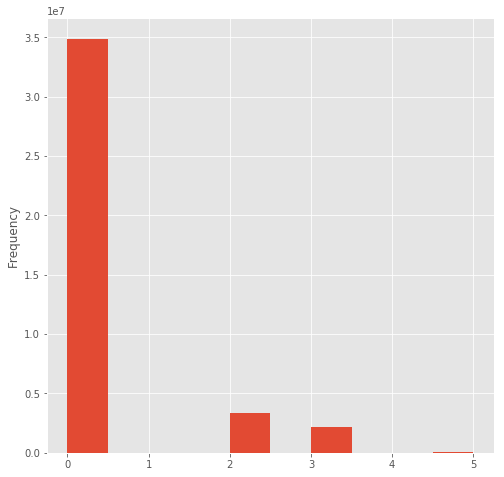

In [4]:
df.device_conn_type.plot(kind = 'hist', figsize = (8, 8))

In [22]:
df.device_conn_type.value_counts()

0    34886838
2     3317443
3     2181796
5       42890
Name: device_conn_type, dtype: int64

In [24]:
df[ ['device_conn_type', 'click'] ].groupby('device_conn_type').mean()

,click
device_conn_type,
0,0.181125
2,0.135289
3,0.044043
5,0.029611


In [28]:
df.click.value_counts()

0    33563901
1     6865066
Name: click, dtype: int64

In [21]:
6865066 % 40428967

6865066

# Logistic Regression Analysis

In [17]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

In [18]:
c = df.click


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

logit = LogisticRegression()

estimator = LogisticRegression()
selector = RFECV(estimator)
selector = selector.fit(X[independent_variables],df['click'])

support = pd.DataFrame(data = selector.support_, index = X[independent_variables].columns, 
             columns = ['support']).query("support == True")
support

NameError: name 'independent_variables' is not defined

In [20]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[ -7.04679025e-08  -4.84319735e-09   1.70995200e-09  -2.45402473e-09
   -7.73305904e-09  -2.37469187e-05  -7.96746376e-08   7.08845760e-07
   -2.69223698e-06   2.80628302e-09  -6.60632271e-08  -2.85186055e-06
   -5.31957204e-07]]
[  2.15560346e-15]


In [21]:
model.score(X,c)

0.83019437523595396

IMPROVING THE MODEL ATTEMPT #1: Making dummy vraiables for site_category to try to make a better model. 

In [6]:
site_category_df = pd.get_dummies(df.site_category, prefix = 'site_category')

df = df.join(site_category_df)

In [7]:
df.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,site_category_8fd0aea4,site_category_9ccfa2ea,site_category_a72a0145,site_category_a818d37a,site_category_bcf865d9,site_category_c0dd3be3,site_category_c706e647,site_category_da34532e,site_category_dedf689d,site_category_e787de0e,site_category_f028772b,site_category_f66779e6
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,0,0,0,0,0,0,0,0,0,0,0
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,0,0,0,0,0,0,0,0,0,0,0
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,0,0,0,0,0,0,0,0,0,0,0
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,0,0,0,0,0,0,0,0,0,0,0
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
for column in df.columns:
    print column

id
click
hour
C1
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21
site_category_0569f928
site_category_110ab22d
site_category_28905ebd
site_category_335d28a8
site_category_3e814130
site_category_42a36e14
site_category_50e219e0
site_category_5378d028
site_category_6432c423
site_category_70fb0e29
site_category_72722551
site_category_74073276
site_category_75fa27f6
site_category_76b2941d
site_category_8fd0aea4
site_category_9ccfa2ea
site_category_a72a0145
site_category_a818d37a
site_category_bcf865d9
site_category_c0dd3be3
site_category_c706e647
site_category_da34532e
site_category_dedf689d
site_category_e787de0e
site_category_f028772b
site_category_f66779e6


In [9]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'site_category_0569f928',
 'site_category_110ab22d',
 'site_category_28905ebd',
 'site_category_335d28a8',
 'site_category_3e814130',
 'site_category_42a36e14',
 'site_category_50e219e0',
 'site_category_5378d028',
 'site_category_6432c423',
 'site_category_70fb0e29',
 'site_category_72722551',
 'site_category_74073276',
 'site_category_75fa27f6',
 'site_category_76b2941d',
 'site_category_8fd0aea4',
 'site_category_9ccfa2ea',
 'site_category_a72a0145',
 'site_category_a818d37a',
 'site_category_bcf865d9',
 'site_category_c0dd3be3',
 'site_category_c706e647',
 'site_category_da34532e',
 'site_category_dedf689d',
 'site_category_e787de0e',
 'site_category_f028772b',
 'site_category_f66779e6',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

In [10]:
c = df.click

In [11]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[ -7.04679031e-08  -4.84319726e-09   1.70995194e-09  -2.45402466e-09
   -7.73305881e-09  -1.65226876e-11  -7.12251300e-15   1.78660603e-09
   -8.33590000e-11   2.62939089e-09   1.30115926e-12  -5.07490386e-09
   -3.23737852e-13  -2.93391880e-15  -5.25308891e-12  -2.40329294e-11
   -4.86921082e-15  -7.95008879e-11  -1.15119467e-10  -8.26736401e-12
   -3.72912805e-13  -2.89736014e-15  -4.31854127e-12  -9.93055481e-13
   -1.61405747e-11  -3.77952797e-14  -3.04060914e-14   6.19318355e-11
   -8.02700698e-13   1.18784620e-09  -2.37077130e-10  -2.37469183e-05
   -7.96746352e-08   7.08845739e-07  -2.69223693e-06   2.80628296e-09
   -6.60632218e-08  -2.85186049e-06  -5.31957190e-07]]
[  2.15570458e-15]


In [13]:
model.score(X,c)

0.83019437523595396

IMPROVING THE MODEL ATTEMPT #2: Can I create dummy variables for the 'hour' variable? Possibily by breaking down the variable into waking and sleeping time of day?

In [37]:
df.loc[:,'hour']

0           14102100
1           14102100
2           14102100
3           14102100
4           14102100
5           14102100
6           14102100
7           14102100
8           14102100
9           14102100
10          14102100
11          14102100
              ...   
40428955    14103023
40428956    14103023
40428957    14103023
40428958    14103023
40428959    14103023
40428960    14103023
40428961    14103023
40428962    14103023
40428963    14103023
40428964    14103023
40428965    14103023
40428966    14103023
Name: hour, dtype: int64

In [38]:
assert df.loc[:,'hour'].reverse().take(2).reverse() == "23"

AttributeError: 'Series' object has no attribute 'reverse'

In [39]:
df.groupby('hour').mean()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
hour,,,,,,,,,,,,,
14102100,0.174714,1005.034603,0.198301,1.056140,0.199150,17683.527511,318.340857,56.813976,1964.200074,0.791397,131.980606,37835.113986,88.471875
14102101,0.173695,1004.999942,0.220850,1.029598,0.197341,17954.223214,318.396822,57.482662,2000.328713,1.013467,176.355539,42119.572758,78.479984
14102102,0.150696,1005.033879,0.221048,1.033566,0.261145,18698.973996,320.287809,55.678866,2098.029493,1.259593,262.845945,44401.676191,64.618400
14102103,0.169791,1005.161609,0.247136,1.017646,0.182835,17873.654987,318.652117,57.104807,1991.737328,1.652117,173.433493,50363.438122,63.766533
14102104,0.151206,1005.161844,0.241739,1.018197,0.229133,18427.653607,318.786465,55.830419,2062.374529,1.850290,181.759115,48804.422631,69.056904
14102105,0.148845,1005.040757,0.233331,0.995612,0.287192,18919.031068,318.820490,57.265199,2127.101185,1.902852,189.008519,42979.247857,58.817016
14102106,0.161259,1004.931912,0.273444,0.989204,0.240047,18438.803550,318.352061,57.510788,2064.255494,1.706453,199.166019,43133.730686,60.146738
14102107,0.169752,1004.906149,0.277448,0.984482,0.230771,18146.533436,318.122411,57.896795,2027.175643,1.570696,203.532772,44064.925011,62.064908
14102108,0.169945,1004.894072,0.307493,0.979715,0.213608,18329.697849,317.512594,57.215910,2050.467372,1.737194,183.305326,45306.616573,70.259419


In [40]:
df[ ['hour', 'click'] ].groupby('hour').mean()


,click
hour,
14102100,0.174714
14102101,0.173695
14102102,0.150696
14102103,0.169791
14102104,0.151206
14102105,0.148845
14102106,0.161259
14102107,0.169752
14102108,0.169945
